In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from importlib import reload

import TunaSims
import func_ob
import solvers

Results for Different Ways of Distributing Interspectral Intensity Difference

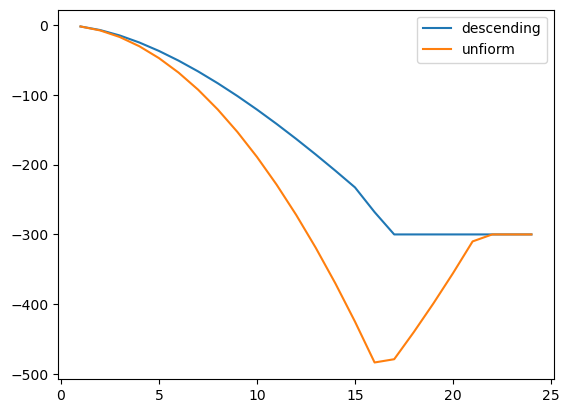

In [2]:
xs=list()
scores_1=list()
scores_2=list()

total_difference = 0.9
len_difference = 10
max_len = 25

func1 = partial(TunaSims.tuna_dif_distance,e=1,f=-1,h=500, i=-3,j=2,k=-800)
func2 = partial(TunaSims.tuna_dif_distance,e=1,f=-1,h=500,i=-3,j=2,k=-800)

normalize = False

for i in range(1,max_len):

    xs.append(i)
    dif_1 = np.array([1/(x+1) for x in range(i)])
    dif_1 = dif_1/sum(dif_1)*total_difference

    dif_2 = np.array([total_difference/i for x in range(i)])

    if normalize:
        scores_1.append(1- 1/func1(dif_1))
        scores_2.append(1 - 1/func2(dif_2))
    else:
        scores_1.append(func1(dif_1, np.zeros(len(dif_1))))
        scores_2.append(func2(dif_2, np.zeros(len(dif_2))))

plt.plot(xs, scores_1, label='descending')
plt.plot(xs, scores_2, label='unfiorm')

plt.legend()
plt.show()

In [20]:
squared_loss = lambda x: x**2
lin_loss = lambda x: x
l1_reg = lambda l,x: l*sum(np.abs(x))
l2_reg = lambda l,x: l*sum(x**2)

#objective_ = partial(func_ob.objective, loss_func = squared_loss, reg_func= l1_reg, distance_func=TunaSims.tuna_dif_distance)

In [21]:
reload(func_ob)
objective = func_ob.func_ob(name='test',
                    distance_func = TunaSims.tuna_dif_distance,
                    regularization_func = partial(l1_reg,1),
                    loss_func=squared_loss,
                    init_vals = np.zeros(3),
                    params = ['a','b','c'],
                    solver = 'stoch',
                    bounds = None,
                    lambdas = 1,
                    max_iter = 1e5,
                    tol = 1e-10,
                    momentum_weights = [0.8,0.2],
                    epsilon = 1.4901161193847656e-08,
                    momentum_type = None
)


In [3]:

from matplotlib.pyplot import bar
res = pd.read_csv("C:\\Users\\jonah\\Downloads\\10_ppm.csv", header=None)
res.columns=['yool','metric','AUC','clean_specs']
res = res[~res['metric'].str.contains('omd')]

In [137]:
alpha =0.8
colors = {'entropy':('red',alpha),
            'dot_product':('green',alpha),
            'proportional_entropy':('blue',alpha),
            'lorentzian':('cyan',alpha),
            'cross_ent':('chartreuse',alpha),
            'fidelity':('purple',alpha),
            'proportional_manhattan':('orange',alpha),
            'max_fidelity':('pink',alpha),
            'matusita':('aquamarine',alpha),
            'proportional_lorentzian':('sky blue',alpha),
            'chi2':('magenta', alpha),
            'laplacian':('teal',alpha),
            'max_laplacian':('gray',alpha),
            'harmonic_mean':('olive',alpha),
            'bhattacharya_1':('brown',alpha),
            'squared_chord':('silver',alpha)}

filt_cleans = [['n:0.01, c:0.05da, p:None, pr:True'],['n:0.01, c:0.05da, p:orig, pr:True'],['n:0.01, c:0.005da, p:orig, pr:True'],['n:0.0, c:0.005da, p:orig, pr:True']]
#filt_metrics = list(set(res['metric']))
filt_metrics = ['entropy','dot_product','bhattacharya_1','cross_ent','fidelity','squared_chord']
subs=list()
titles=list()
sub_colors=list()
sub_length = 6

for settings in filt_cleans:

    sub = res[(np.isin(res['clean_specs'],settings)) & ((np.isin(res['metric'],filt_metrics)))]
    sub.sort_values(by='AUC', inplace=True, ascending=False)
    sub=sub[:sub_length]
    colors_ = [colors[i] for i in sub['metric']]
    subs.append(sub)
    sub_colors.append(colors_)
    params = settings[0].split(',')
    titles.append(f'Noise Clipping: {params[0].split(":")[-1]}, Match Tolerance: {params[1].split(":")[-1]}, Reweighting: {params[2].split(":")[-1]}')




C:\Users\jonah\AppData\Local\Temp\ipykernel_17536\2023734344.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.sort_values(by='AUC', inplace=True, ascending=False)


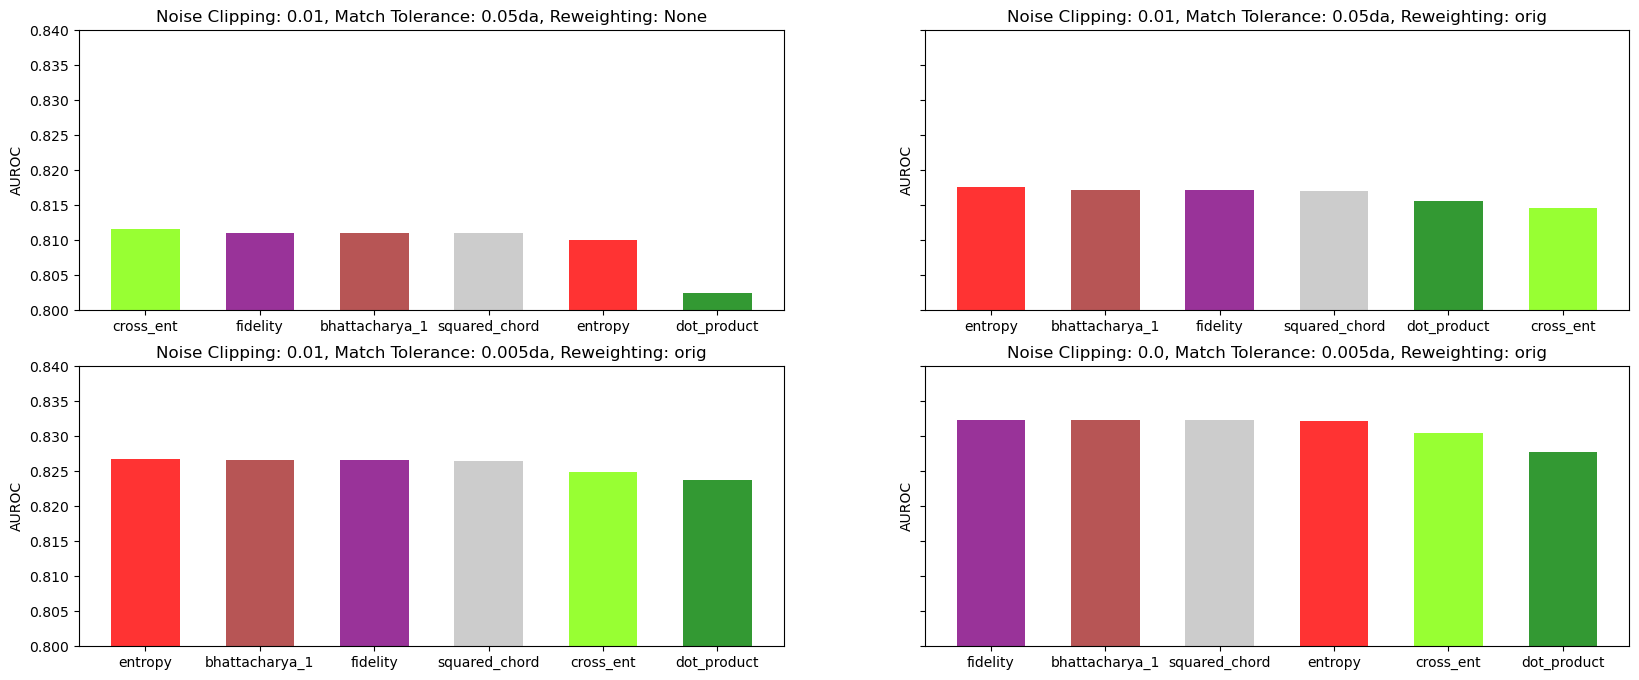

: 

In [152]:
height=len(subs)*2
width=len(subs)*5
fig,axs = plt.subplots(int(len(subs)/2),int(len(subs)/2), sharey=True)
plt.ylim([0.8,0.84])
fig.set_figheight(height)
fig.set_figwidth(width)
for i in range(len(subs)):
    
    axs.flat[i].set_ylabel('AUROC')
    axs.flat[i].set_title(titles[i])
    axs.flat[i].bar(x=subs[i]['metric'],height=subs[i]['AUC'], width=0.6, color=sub_colors[i])

plt.show()

In [1]:
def fig1(path):

    res = pd.read_csv(path, header=None)
    res.columns=['yool','metric','AUC','clean_specs']
    res = res[~res['metric'].str.contains('omd')]

    alpha =0.8
    colors = {'entropy':('red',alpha),
                'dot_product':('green',alpha),
                'proportional_entropy':('blue',alpha),
                'lorentzian':('cyan',alpha),
                'cross_ent':('chartreuse',alpha),
                'fidelity':('purple',alpha),
                'proportional_manhattan':('orange',alpha),
                'max_fidelity':('pink',alpha),
                'matusita':('aquamarine',alpha),
                'proportional_lorentzian':('sky blue',alpha),
                'chi2':('magenta', alpha),
                'laplacian':('teal',alpha),
                'max_laplacian':('gray',alpha),
                'harmonic_mean':('olive',alpha),
                'bhattacharya_1':('brown',alpha),
                'squared_chord':('silver',alpha)}

    filt_cleans = [['n:0.01, c:0.05da, p:None, pr:True'],['n:0.01, c:0.05da, p:orig, pr:True'],['n:0.01, c:0.005da, p:orig, pr:True'],['n:0.0, c:0.005da, p:orig, pr:True']]
    #filt_metrics = list(set(res['metric']))
    filt_metrics = ['entropy','dot_product','bhattacharya_1','cross_ent','fidelity','squared_chord']
    subs=list()
    titles=list()
    sub_colors=list()
    sub_length = 6

    for settings in filt_cleans:

        sub = res[(np.isin(res['clean_specs'],settings)) & ((np.isin(res['metric'],filt_metrics)))]
        sub.sort_values(by='AUC', inplace=True, ascending=False)
        sub=sub[:sub_length]
        colors_ = [colors[i] for i in sub['metric']]
        subs.append(sub)
        sub_colors.append(colors_)
        params = settings[0].split(',')
        titles.append(f'Noise Clipping: {params[0].split(":")[-1]}, Match Tolerance: {params[1].split(":")[-1]}, Reweighting: {params[2].split(":")[-1]}')




    height=len(subs)*2
    width=len(subs)*5
    fig,axs = plt.subplots(int(len(subs)/2),int(len(subs)/2), sharey=True)
    plt.ylim([0.8,0.84])
    fig.set_figheight(height)
    fig.set_figwidth(width)
    for i in range(len(subs)):
        
        axs.flat[i].set_ylabel('AUROC')
        axs.flat[i].set_title(titles[i])
        axs.flat[i].bar(x=subs[i]['metric'],height=subs[i]['AUC'], width=0.6, color=sub_colors[i])

    plt.show()

NameError: name 'res' is not defined